In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

# Homework 1
### Edwin Jaramillo (00320842)

### 1. Assume we implemented an algorithm that has complexity approximately $n log(n)$. How much faster is this implementation compared to one of complexity $n^2$?

In [2]:
#Creacion de un DataFrame
r = pd.DataFrame()
r['n'] = np.arange(1,10,1)

In [3]:
#Ubicación de valores
r['log(n)'] = np.log2(r['n'])
r['nlog(n)'] = r['n'] * r['log(n)']
r['n^2'] = np.power(r['n'],2)

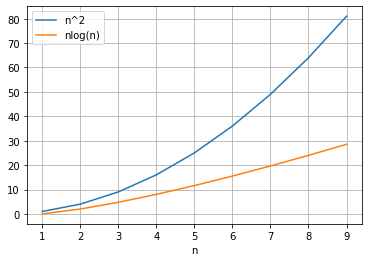

In [4]:
#Presentación de la gráfica
r.plot(x='n', y=['n^2', 'nlog(n)'])
plt.grid()

Podemos ver claramente como n^2 crece más rápido, por lo que nlog(n) es mucho más rapida

### 2. The runtime of an algorithm is captured in the following table:

As precissely as possible, estimate the function that describes the growth of the runtime 

|$n$  | runtime -- $T(n)$|
|---- | ----- |
|1000|0.0|
|2000|0.02|
|4000|0.2|
|8000|0.6|
|16000|2.6|
|32000|10.4|
|64000|41.6|

Para identificar la función que describe de mejor manera el crecimiento se puede realizar una gráfica para de esta manera poder observar el conportamiento que tiene la función.

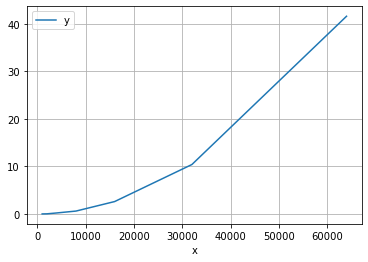

In [5]:
#Creación del DataFrame y asignación de valores
r = pd.DataFrame()
r['x'] = np.array([1000,2000,4000,8000,16000,32000,64000])
r['y'] = np.array([0.0,0.02,0.2,0.6,2.6,10.4,41.6])

#Presentación de la gráfica
r.plot(x='x', y='y')
plt.grid()

Se puede observar como la gráfica obtenida va tomando la forma de media parabola positiva. Por lo que se puede concluir que la función que describe el crecimiento del tiempo de ejecución con la mayor estimación posible es una función cuadrática tal que
> $T(n) = ax^2 + bx + c$

### 3. By estimating the number of operations as a function of $n$, estimate the complexity of the following function

```
def func1(n):                                     
    A = range(0,n)                                
    sum = 0                                       
    i = 0                                         
    for x in A[i:]:                               
        i += 1                                    
        for j in range(i, len(A)):               
            y = A[j]                              
            k = j                                
            while k < len(A):                     
                z = A[k]                          
                k = 2*k                           
                if x + y <= z:                    
                    sum += 1                      
    return sum
```

### 4. From class, remember the code we use to get the sum of the first $n$ positive integers:

```
def sum1(n):
    total = 0
    for i in range(1, n+1):
        total += i
    return total
```

Now consider a different function that does the same thing.

```
def sum2(n): 
    total = n*(n+1)//2
    return total
```

1. Run the two functions and make sure that they return the same outputs. Use $n = 5, 8, 103, 527$
2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$
3. Plot the runtime as a function of $n$ for both functions in the same figure. 
    - Use different line colors and markers to help distinguish between the two curves. 
4. Analytically estime the runtime functions for the functions `sum1` and `sum2`. Call them $T_1(n)$ and $T_2(n)$.
    - Note that the times obtained in your computer will be different to the ones shown in class since the speed and memory of the computers used to run the code are likely different
5. How long will it take to run the code for $n = 10^{100}$ using `sum1` and `sum2`? What are your main impressions about the difference?

**Hint:** Use and modify the code from the slides to get and plot the runtime


In [6]:
from time import time
from time import sleep

def sum1(n):
    sleep(1)
    total = 0
    for i in range(1, n+1):
        total += i
    return total

def sum2(n): 
    sleep(1)
    total = n*(n+1)//2
    return total

In [7]:
#1. Run the two functions and make sure that they return the same outputs. Use n = 5, 8, 103, 527

#Impresión datos para sum1
print ("Datos de la función sum1 con n = 5, 8, 103, 527")
print(sum1(5))
print(sum1(8))
print(sum1(103))
print(sum1(527))

#Impresión datos para sum2
print ("Datos de la función sum2 con n = 5, 8, 103, 527")
print(sum2(5))
print(sum2(8))
print(sum2(103))
print(sum2(527))

Datos de la función sum1 con n = 5, 8, 103, 527
15
36
5356
139128
Datos de la función sum2 con n = 5, 8, 103, 527
15
36
5356
139128


In [8]:
#Pregunta 2.

#Creación del decorador con un pause de 10^6 segundos
def timer_func(func):
    def wrap_func(*args, **kwargs):
        t1 = time()*10**6
        result = func(*args, **kwargs)
        t2 = time()*10**6
        t_total = t2-t1-10**6
        return result, t_total
    return wrap_func

#Aplicación del decorador en las funciones
@timer_func
def sum1(n):
    sleep(1)
    total = 0
    for i in range(1, n+1):
        total += i

@timer_func
def sum2(n): 
    sleep(1)
    total = n*(n+1)//2
    return total

In [9]:
#Impresión datos para sum1
print ("Runtime de sum1 en micro segundos")
runtime1 = [sum1(x)[1] for x in [1, 10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9]]
print (runtime1)

#Impresión datos para sum2
print ("Runtime de sum2 en micro segundos")
runtime2 = [sum2(x)[1] for x in [1, 10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9]]
print (runtime2)

Runtime de sum1 en micro segundos
[2208.75, 1179.0, 2003.5, 1599.25, 9161.0, 7276.25, 56796.0, 481794.75, 4877948.5, 50501148.0]
Runtime de sum2 en micro segundos
[14412.75, 8198.5, 9187.5, 4428.25, 13374.75, 12021.25, 2181.0, 9458.5, 13444.25, 13234.0]


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

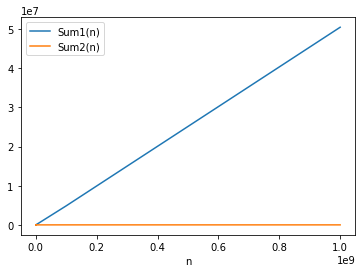

In [10]:
#Pregunta 3

#Gráfica para sum1 y sum2
list = [1, 10, 10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8, 10**9]

#Creación del DataFrame
df = pd.DataFrame()
df["n"] = list
df["Sum1(n)"] = runtime1
df["Sum2(n)"] = runtime2

#Presentación de gráfica
df.plot(x='n')
plt.xlabel('n')
plt.grid

In [11]:
#Pregunta 4

#Cálculo del tiempo de ejecución de sum1
def sum1(n):                                    
    sleep(1)                                    
    total = 0                                   #c1      2
    for i in range(1, n+1):                     #c2      n
        total += i                              #c3      n
    return total       

"""""
 T_1(n) = 2c_1 + (c_2 + c_3)n
"""""


#Cálculo del tiempo de ejecución de sum2
def sum2(n):                                         
    sleep(1) 
    total = n*(n+1)//2                         #c1      1
    return total
"""""
 T_2(n) = c_1
"""""

'""\n T_2(n) = c_1\n'

Pregunta 5

Para $n = 10^{100}$ en el caso de sum1 va a tomar mucho tiempo ya que el crecimiento es lineal, mientras que para sum2 en donde el crecimiento es constante no va a tomar mucho tiempo, aqui se va a notar una gran diferencia entre estas cantidades de tiempo

### 5. Prove that the running time of an algorithm is $\Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $\Omega(g(n))$

Gracias a la definición de $\Omega(g(n))$, sabemos que existe un $n_0$ y $c_1$ tal que $n > n_1$:

$0 \leq c_1 g(n) \leq T_1(n)$

Además para el peor caso sabemos que $n_1$ and $c_2$ tal que $n > n_2$

$0 \leq T_2(n) \leq c_2 g(n)$

Entonces podemos ver que $n > max(n_1, n_2)$

$0 \leq c_1 g(n) \leq T_1(n) \leq T_2(n) \leq c_2 g(n)$

En donde se puede observar que el tiempo de ejecución se encuentra entre $T_1$ y $T_2,$

Entonces podemos decir que el tiempo de ejecución es $\Theta(g(n))$

### 6.  Sort the following functions in decreasing order of asymptotic complexity ($O(f(n))$):

- $f_1(n) = \sqrt{n}$
- $f_2(n) = n^3$
- $f_3(n) = {n\choose 4}$
- $f_4(n) = \sum_{i=2}^n (i-1)$

Por un lado tenemos a $f_3(n) = {n\choose 4} = n^4$ por lo que tiene complejidad ($O(n^4)$)

Para el caso de $f_2(n) = n^3$ la cual tiene una complejidad mayor que todas ($O(n^3)$)

Ademas podemos notar que $f_4(n) = \sum_{i=2}^n (i-1)= \frac{n(n+1)}{2} = \frac{n^2+n}{2}$ tal que su complejidad es ($O(n^2)$).


Y por ultimo la de menor comlejidad es $f_1(n) = \sqrt{n}$

Entonces podemor concluir que

$f_1 \leq f_4 \leq f_2 \leq f_3$

### 7. Implement the methods of the class `Array` that deal with deletion of elements. Consider the 3 cases we considered in class.

In [12]:
import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """

    def __init__(self, n, values=None):
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)  
            
    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()
                
        
    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x
    
    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        if not self[item_index]:
            self.item_count += 1
        self.array[item_index] = item
    
    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.item_count] = item
            self.item_count += 1
            
    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

    
    def insert(self, index, element):
        """
        implementation of insert
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        if (index < 0) or (index > self.l):
            raise IndexError('index out of range!')
        x = self.l
        while x > index:
            self.array[x] = self.array[x-1]
            x -= 1
        self.array[index] = element
        self.l += 1    


    def delete(self, index):
        """
        implementation of delete
        """
        if self.l == self.n:
            raise ValueError("no more capacity")
        if (index < 0) or (index >= self.l):
            raise IndexError('index out of range!')

        for x in range(index, self.l-1):
            self.array[x] = self.array[x+1]

        self.array[self.l - 1] = None
        self.l -= 1

In [13]:
# Create the array
X = Array(10)

In [14]:
# Insert elements at different positions
X.insert(0,3)
X.insert(0,2)
X.insert(0,1)
X.insert(2,5)
X.insert(3,6)
X.list_array()

'1, 2, 5, 6, 3, _, _, _, _, _'

In [15]:
# Delete at the beginning
X.delete(0)
X.list_array()

'2, 5, 6, 3, _, _, _, _, _, _'

In [16]:
# Delete in the middle
X.delete(2)
X.list_array()

'2, 5, 3, _, _, _, _, _, _, _'

In [17]:
# Delete at the end
X.delete(1)
X.list_array()

'2, 3, _, _, _, _, _, _, _, _'